In [1]:
import pandas as pd
from mlxtend import preprocessing
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_score_clean_extraction.csv')
x = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [3]:
scaler_min_max = preprocessing.minmax_scaling(df, columns=x.columns)
new_df = pd.concat([scaler_min_max,y],axis=1)
new_df.to_csv('scale_min_max.csv', index=False)

In [4]:
scaler_ru = RobustScaler()

# Fit the scaler to the data
scaler_ru.fit(x)

# Transform the data using the scaler
scaled_data = scaler_ru.transform(x)
scale_Robust= pd.DataFrame(scaled_data, columns=x.columns)
new_df = pd.concat([scale_Robust,y],axis=1)
new_df.to_csv('scale_Robust.csv', index=False)

In [5]:
scaled_min = x.copy()
for column in scaled_min.columns:
    try:
        data = scaled_min[column]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clipped_data = np.clip(data, lower_bound, upper_bound)  # Define appropriate bounds
        reshaped = clipped_data.values.reshape(-1, 1)  # Reshape your data
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(reshaped)
        scaled_min[column] = scaled_data
    except Exception as e:
        continue
new_df = pd.concat([scaled_min,y],axis=1)
new_df.to_csv('scale_min_sklearn.csv', index=False)

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_st = pd.DataFrame(scaled_data, columns=x.columns)    
new_df = pd.concat([scaled_st,y],axis=1)
new_df.to_csv('scale_standard.csv', index=False)

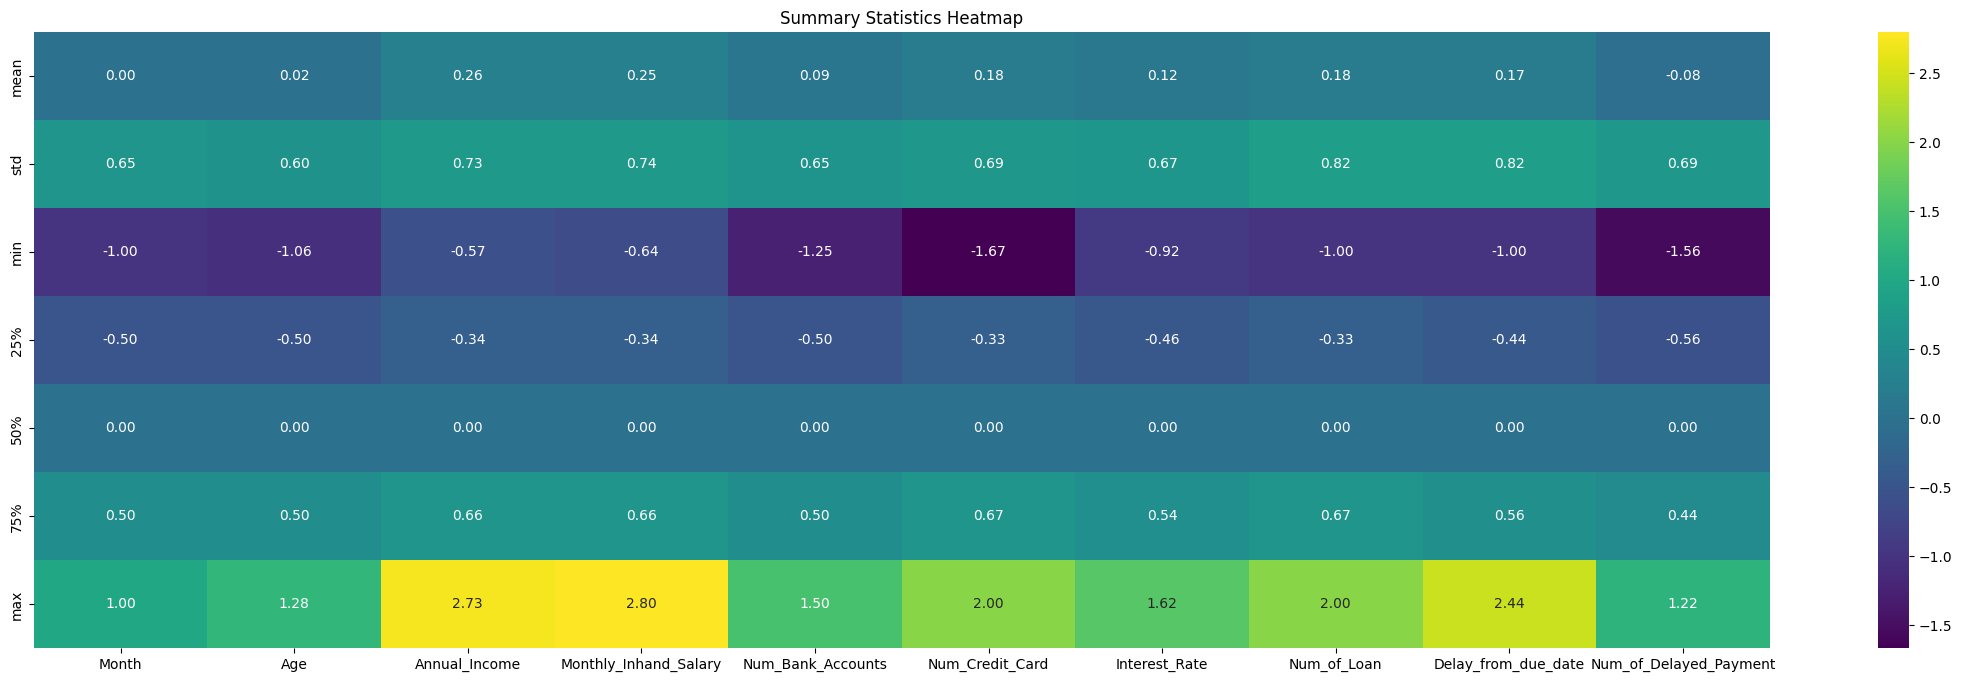

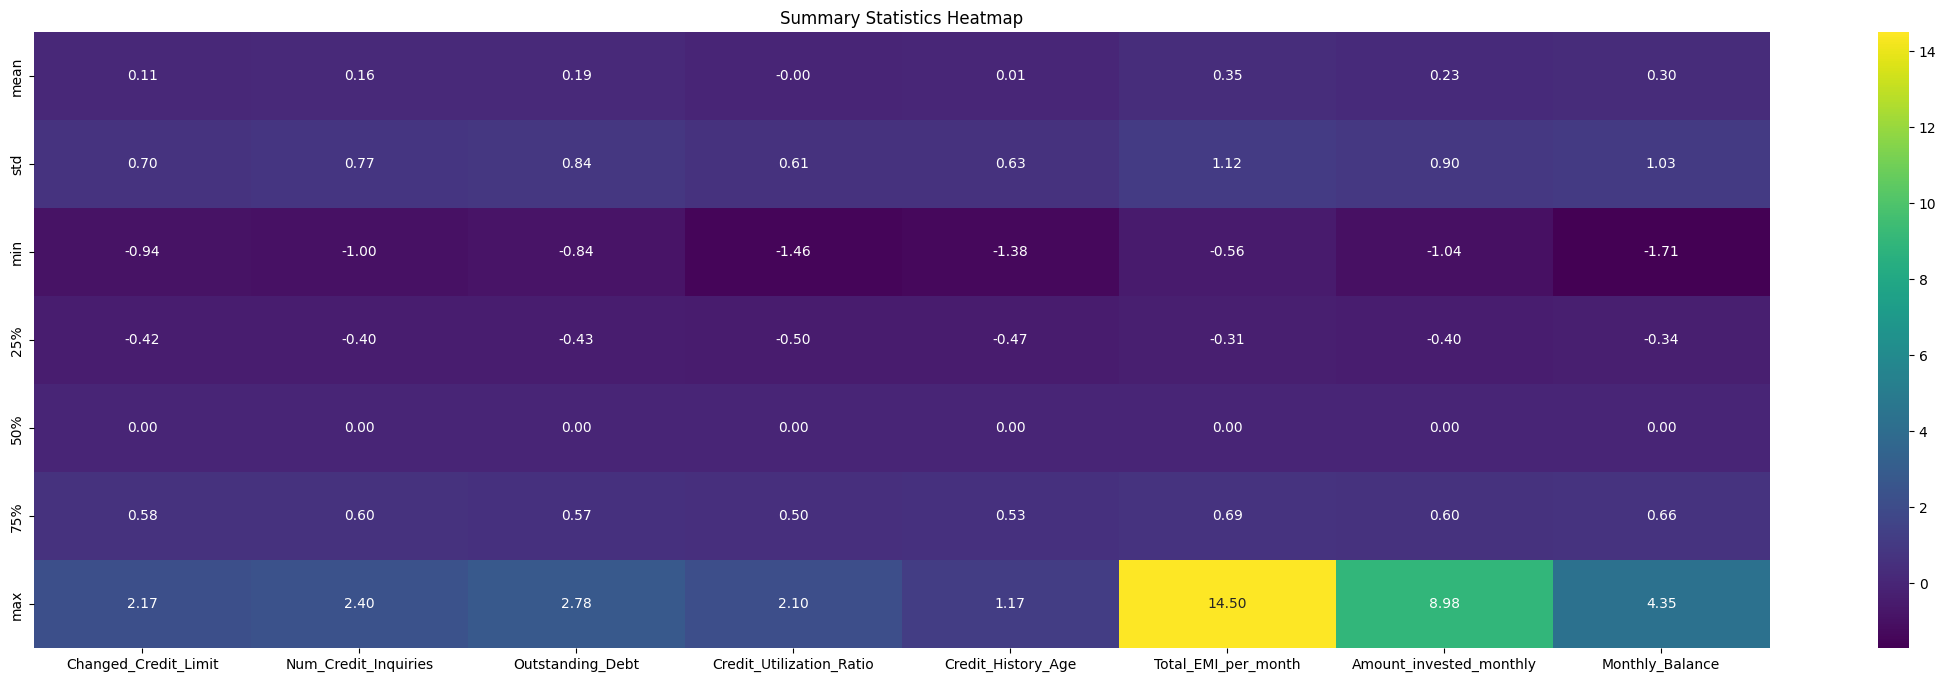

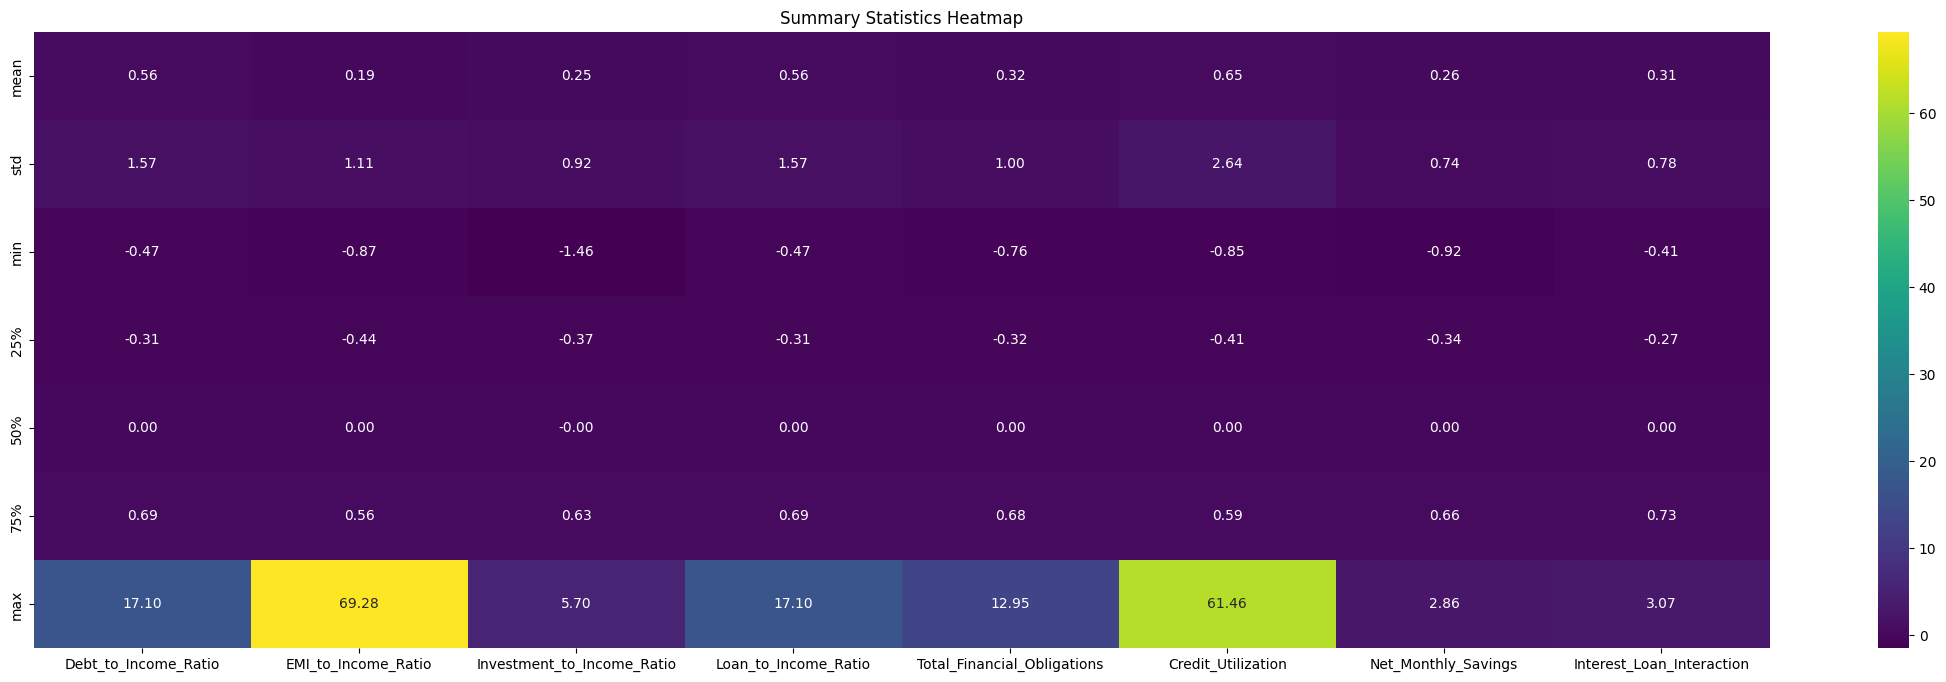

In [7]:

dfs = pd.read_csv('scale_Robust.csv')
columns = ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment','Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance','Debt_to_Income_Ratio','EMI_to_Income_Ratio','Investment_to_Income_Ratio','Loan_to_Income_Ratio',
          'Total_Financial_Obligations',"Credit_Utilization",'Net_Monthly_Savings','Interest_Loan_Interaction']
dfs_1 = dfs[columns]
summary_stats = dfs_1.iloc[:,0:10].describe().drop('count')
summary_stats_second = dfs_1.iloc[:,10:18].describe().drop('count')
summary_stats_third = dfs_1.iloc[:,18:].describe().drop('count')


plt.figure(figsize=(28, 8))
sns.heatmap(data=summary_stats, annot=True, fmt=".2f", cmap="viridis")
plt.title('Summary Statistics Heatmap')
plt.xticks()
plt.show()

plt.figure(figsize=(28, 8))
sns.heatmap(data=summary_stats_second, annot=True, fmt=".2f", cmap="viridis")
plt.title('Summary Statistics Heatmap')
plt.xticks()
plt.show()

plt.figure(figsize=(28, 8))
sns.heatmap(data=summary_stats_third, annot=True, fmt=".2f", cmap="viridis")
plt.title('Summary Statistics Heatmap')
plt.xticks()
plt.show()
